## 1. Setting up environment

Be sure to set env_name to the name of the Unity environment file you want to launch. For this example its the build of our project


In [1]:
env_name = "../4th-Year-Project/Builds/Random-Action/4th-Year-Project"  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

## 2. Load Dependancies

The following loads the necessary dependencies and checks the Python version (at runtime). 
ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mlagents.envs import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


## 3. Start the environment

UnityEnvironment launches and begins communication with the environment when instantiated.

A Unity launcher will appear and prompt the user for preferences. You can adjust these yourself or leave them as is. Once you are ready click play and the program should execute.
On execution it should stall, once it does navigate to this notebook and execute the next cell.

Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.


In [3]:
env = UnityEnvironment(file_name=env_name)

# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Reset Parameters :
		
Unity brain name: Brain
        Number of Visual Observations (per agent): 0
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): [2]
        Vector Action descriptions: , 


## 4. Restart Environment and view current state of the agent

We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, states refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, observations refer to a set of relevant pixel-wise visuals for an agent.


In [4]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

Agent state looks like: 
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.86000001  0.
  0.13999996 -1.86000001  1.         -1.          0.          0.        ]


## 5. Take random actions in the environment

Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the action_space_type of the default brain.

Once this cell is executed, 100 messages will be printed that detail how much reward will be accumulated for the next 100 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next.

In [5]:
x = []
for episode in range(100):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        action_size = brain.vector_action_space_size
        if brain.vector_action_space_type == 'continuous':
            env_info = env.step(np.random.randn(len(env_info.agents), 
                                                action_size[0]))[default_brain]
        else:
            action = np.column_stack([np.random.randint(0, action_size[i], size=(len(env_info.agents))) for i in range(len(action_size))])
            env_info = env.step(action)[default_brain]
        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))
    x.append(round(episode_rewards, 2))
print(x)

Total reward this episode: -128.8999922350049
Total reward this episode: -423.0999746993184
Total reward this episode: -96.57499416172504
Total reward this episode: -106.94999354332685
Total reward this episode: -36.37499774992466
Total reward this episode: 1.8250000327825546
Total reward this episode: -71.47499565780163
Total reward this episode: -1371.999918140471
Total reward this episode: -125.12499246001244
Total reward this episode: -0.7999998703598976
Total reward this episode: -608.8499636277556
Total reward this episode: -103.89999372512102
Total reward this episode: -66.04999598115683
Total reward this episode: -528.9749685674906
Total reward this episode: -84.3999948874116
Total reward this episode: -156.42499059438705
Total reward this episode: -184.62498891353607
Total reward this episode: -39.8749975413084
Total reward this episode: -369.39997790008783
Total reward this episode: -236.34998583048582
Total reward this episode: -1169.0499302372336
Total reward this episode: 

## 6. Plot Rewards onto a graph

Once the episodes have finished, we append each reward value into an array. We then plot the values of the array onto a graph. Considering this is a random input the graph results will vary greatly

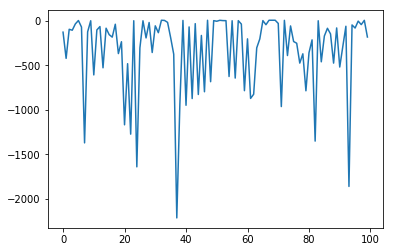

In [9]:
y = np.arange(100)
plt.plot(y, x)
plt.ylabel('Rewards')
plt.xlabel('Episode')
plt.show()

## 7. Close Environment

In [10]:
env.close()